# Linear Regression

In this lab, we will explore the fundamental underpinnings of linear algebra we have hinted at for the last several classes: linear combinations of vectors. This lab has two parts spread over two weeks. 

The fundamental questions we ask is
1. What is the space of linear combinations of $n$ arbitrary vectors $v_1,\ldots, v_n$?
2. The notion of linear independence.
3. Can a vector $u$ be written as a linear combination of $v_1,\ldots,v_n$?
4. If not, what is the projection of $u$ onto the space of linear combinations of $v_1,\ldots, v_n$.



In [1]:
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


[[0]
 [0]]


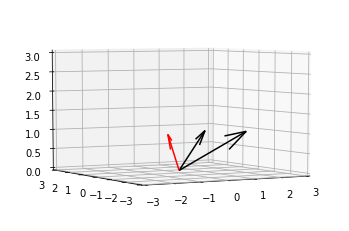

In [2]:
 # We now look at two vectors (2,-1,1) and (1,0,1)

u = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'])
plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


We will plot the set of all linear combinations of the two vectors above. We should be getting a plane
of course, but let us do it and see for ourselves. If ${\bf u}_1$ is the vector in the first row above, and ${\bf u}_2$
the vector in the second row, we will plot all vectors in the set
$$ \bigl\{  w_1 {\bf u}_1 + w_2 {\bf u}_2 : -2 \le w_1 \le 2 \textrm{ and } -2 \le w_2 \le 2 \bigr\}.$$
You can of course plot more points if you wish, but these should give us a pretty good idea.

A couple of points below. If we think of ${\bf u}_1$ and ${\bf u}_2$ as row vectors, then
$$ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} {\bf u}_1 \\ {\bf u}_2 \end{bmatrix} = w_1 {\bf u}_1 + w_2 {\bf u}_2. $$
Our implementation will exploit this.

We will plot all the vectors of the set above as a surface. python requires that we arrange each of the x, y and z coordinates
of these points as a matrix, and the use of meshgrid and the particular array sizes below reflect that constraint.

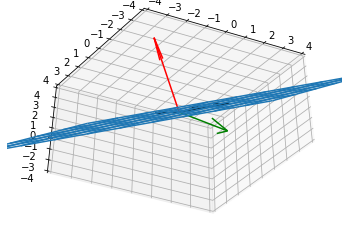

In [3]:
# the following creates a grid of 100*100 
# values in the rectangle with corners (-3,-3)
# (-3,3), (3,3) and (3,-3). The x co-ordinates
# of all the points are assigned to w1 (a 100x100 matrix), the
# y coordinates to w2 (another 100x100 matrix).

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

w1,w2 = np.meshgrid(x,y)

# we are eseentially looking at the linear combination
# of the rows of u for all coefficients -3 \le w1 \le 3
# (obtained by meshgrid above) and -3 \le w2 \le 3.

W = np.stack((w1,w2),axis=2)
ptsonplane = ( W @ u )

# ptsonplane is a 100x100 stack of 3 co-ordinate vectors. 
# The first, second and third coordinates are the x-, y-
# and z- coordinates respectively of the 100x100 points.

Xp = ptsonplane[:,:,0]
Yp = ptsonplane[:,:,1]
Zp = ptsonplane[:,:,2]

origin = [0],[0],[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Xp, Yp, Zp,rstride=20,cstride=10)
plt.quiver(*origin, X, Y, Z, color=['black','black'])

# We also plot the vector perpendicular to the plane: (1,1,-1) (scaled by -3 for better visualization)
# Note that this plane can be represented by (1,1,-1) dot w = 0.

plt.quiver(*origin, -3, -3, 3, color=['red'])

# Note that (1,1,-1) dot (-2, 5, 3) =0, so (-2,5,3) must lie on the plane as well. Sure enough it does.

plt.quiver(*origin, -2/4, 5/4, 3/4, color=['black'])
plt.quiver(*origin, 5,4,4, color=['green'])
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])
ax.set_zlim([-4,4])

# Note from the view at this angle, the three black vectors are on the plane, the red and green are outside the plane.
ax.view_init(-45,240)
plt.draw()

Now we have the three vectors (2,-1,1), (1,0,1) and (-2, 5,3), all of which are on the plane (the black vectors).
We want to see if (5,4,4) (the green vector) can be written as a linear combination of these vectors. Equivalently,
we ask if
$$ w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix} + w_3 \begin{bmatrix} -2 \\5\\3\end{bmatrix}$$
can ever equal (5,4,4) for some values of $w_1,w_2,w_3$. Of course, the vector (5,4,4) dot (1, 1, -1) != 0, so (5,4,4) 
does not lie on the plane above. Any linear combination of the vectors in the equation above can only lie on the blue plane, and never ever leave it. So we conclude that no matter what values of $w_1,w_2, w_3$ we choose, we will not be able to represent (5,4,4) as the linear combination in the equation above.

Completely equivalent is asking if the following set of equations has a solution:

\begin{align*}
2 w_1 - 1 w_2 - 2 w_3 &= 5 \\
-1 w_1 + 0 w_2 + 5 w_3 &= 4 \\
 1 w_1 + 1 w_2 + 3 w_3 &= 4
\end{align*}

The answer again is no. 
 
If the right side of the last equation were changed to 9, we would have solutions---in fact, infinitely many of them. Explain why in a separate cell below.



### Linear least squares

Since (5,4,4) does not lie on the plane, we look for the closest point in the plane to it. How?

Let the projection of the vector (5,4,4) onto the plane be ${\hat w}_1( 2,-1,1) + {\hat w}_2 (1,0,1)$ (we don't really need the third since any point on the plane is already a linear combination of the first two vectors). 

Now the error (column) vector 
$${\bf e} = \begin{bmatrix}5\\4\\4\end{bmatrix} - {\hat w}_1\begin{bmatrix} 2\\-1\\1\end{bmatrix} + {\hat w}_2 \begin{bmatrix}1\\0\\ 1\end{bmatrix}$$ 
must be perpendicular to the plane---ie, perpendicular to every point on the plane. How do we ensure that? We know every point on the plane is 
$$w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}$$
for some two real numbers $w_1$ and $w_2$.
Therefore, if we just ensure that ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1), we will then have for an arbitrary vector on the plane:
\begin{align*} 
{\bf e} \cdot &\Biggl( w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}\Biggr) \\
&= w_1 {\bf e} \cdot \begin{bmatrix} 2\\-1\\1 \end{bmatrix} + w_2 {\bf e} \cdot \begin{bmatrix} 1\\0\\1\end{bmatrix}\\
&= 0 + 0
\end{align*}
where the last equality comes if we ensure ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1).

So that is what we do. Let 
$$X = \begin{bmatrix} 2 & 1 \\ -1 & 0\\ 1 & 1\end{bmatrix} \textrm{ and } {\bf y} = \begin{bmatrix} 5\\4\\4 \end{bmatrix}$$
We look for a vector $\hat {\bf w} = \begin{bmatrix}\hat w_1\\\hat w_2\end{bmatrix}$ such that
$$ 0 = X^T {\bf e}= X^T ( {\bf y} - X{\hat {\bf w}}). $$
This would then imply
$$(X^T X){\hat {\bf w}} = X^T{\bf y} \textrm{ or } \hat {\bf w} = (X^TX)^{-1} X^T {\bf y}.$$

The point closest to the plane is therefore ${\hat w}_1( 2,-1,1) + {\hat w}_2 (1,0,1)$ or $X{\hat {\bf w}}$ (note that a matrix $X$ times a column vector is a linear combination of the columns of $X$). Therefore, the point closest to (5,4,4) is
$$ X\hat {\bf w} = X(X^TX)^{-1} X^T{\bf y}.$$

In [4]:
# Finding the projection of (5,4,4) into the column space of (2,-1,1), (1,0,1) and (-2,5,3)

X= u.T

y = np.array([5,4,4]).reshape(3,1)

from numpy import linalg as lin

hatw = lin.inv(X.T @ X) @ X.T @y

closestpoint = X @ hatw

print('The coefficients we need are ',hatw.T)

The coefficients we need are  [[-2.33333333  8.        ]]


For larger matrices, we prefer to use a better written code (that optimizes the inverse calculations and
also removes redundancies in the matrix X, and cleans it up). For this, we import the linear regression
routine from scikit-learn

In [141]:
from sklearn.linear_model import LinearRegression

# We are not fitting an intercept (yet).
reg = LinearRegression(fit_intercept=False).fit(X, y)

# To retrieve the coefficients, we use the field coef_ in the object. Note that if you want
# check out all attributes and functions in the object reg, you can do so with dir(reg).
# dir(reg)
print('The coefficients from scikit-learn are ', reg.coef_)

# Sure enough they are the same. 

The coefficients from scikit-learn are  [[-2.33333333  8.        ]]


 In our example, (-2,5,3) doesn't add to the plane already spanned by (2,-1,1) and (1,0,1), but adds redundancy to
 description of the linear space. Therefore, (2,-1,1), (1,0,1) and (-2,5,3) are NOT linearly independent.
 Another way of saying this is that there is a linear combination of the three vectors that is 
 equal to 0---can you find that linear combination? Use the cell below to find it using the the explicit method (ie, functions from numpy.linalg) and using the Linear Regression module sklearn.linear_model.LinearRegression. 

What if we do want to fit an intercept, ie the target y = Xw + b, where b is a constant? Here we want to find w and b such
that 

w, b = argmin_{w,b} || y - Xw -b ||^2

Turns out this is no big deal---we just center the examples and the target (namely make their centroid equal to 0). This is because given any choice w, the best choice of b for that w is ymean - Xmean^T w, something you can prove easily by taking the partial derivative of the loss || y - Xw -b ||^2 wrt to b. Substitute back the optimal value of b (for that w), and you have a problem of least squares with no intercept---but with one change: the y and X matrices have their mean (of the rows) subtracted out.


In [142]:
Xmean = np.mean(X, axis = 0)
# for the next line, we are leverage broadcasting to ensure that Xmean is subtracted from each row of X.
newX = X- Xmean

ymean = np.mean(y, axis =0)
# again broadcasting.
newy = y - ymean

newhatw = lin.inv(newX.T @ newX) @ newX.T @y
print('The coefficients when we use an intercept are ',newhatw.T)

# check with what scikit learn does
reg = LinearRegression(fit_intercept=True).fit(X, y)
print('The coefficients (when we fit an intercept) from scikit-learn are: ', reg.coef_ )

The coefficients when we use an intercept are  [[ 1. -2.]]
The coefficients (when we fit an intercept) from scikit-learn are:  [[ 1. -2.]]


Not surprisingly, they are equal. What would have happened if you fed Xnew and ynew to scikit-learn's regression with the option fit_intercept=True? 

Now on to something a little more fun. We will download the Boston dataset (which is available on scikit-learn, keras, but also in many places), and use it to train a model that predicts housing values.

In [143]:
import sklearn
import pandas as pd
from sklearn.datasets import load_boston

In [144]:
boston = load_boston()

In [12]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [145]:
boston.target.shape

(506,)

In [146]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
bos['Value'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [73]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_values, test_values = train_test_split(boston.data, boston.target, test_size = 0.33, random_state = 5)

print('The number of training examples and the number of features resp. are: ', train_data.shape)
print('The number of test examples and the number of features resp. are: ', test_data.shape)

bostonreg = LinearRegression().fit(train_data,train_values)

The number of training examples and the number of features resp. are:  (339, 13)
The number of test examples and the number of features resp. are:  (167, 13)


How good is the model? One way to find out is to predict on the held-out test data. 

We compare with a dummy predictor: it uses the mean of the train_targets as an estimate. It is better than nothing of course, but also suspicious since it always predicts the same value.

In [61]:
pred_values = bostonreg.predict(test_data)
mse = np.sqrt( np.mean((pred_values - test_values) ** 2 ) )
print('Loss with linear regression: ', mse) 

trivial_mse = np.sqrt( np.mean( (np.mean(train_values) - test_values)**2 ) )
print('Trivial predictor: ', trivial_mse)


Loss with linear regression:  5.341391089030524
Trivial predictor:  9.682150179515762


At least we do better than the trivial prediction! 

But it does not answer how good our predictions are. Should we check to see if we can improve our training error? There is a way to do that---we can actually make the training error 0! How do we do this? We have 13 features and 339 examples. We just generate 326 fake features: each feature is a random array of 339 numbers. 

In [148]:
from numpy.random import randn

fakefeatures = randn(339,326)
newtrain = np.hstack((train_data,fakefeatures))


Now let us run linear regression on this new data---what should we see for the new mse?

In [149]:
newreg = LinearRegression().fit(newtrain,train_values)

newpred = newreg.predict(newtrain)

newsse = np.mean((newpred - train_values) ** 2 ) 
print(newmse)


4.463311203231437e-22


It is 0, ignoring the round-offs that made it 10^{-22)! Why is this?

But even though the training error can be made 0, it doesn't mean this model is better. We added 326 fake features, which probably overwhelm any real correlation that existed. Let us predict with this model. The test data has only 13 features of course, so we just apply the coefficients on the real features to the test data (to make multiplication possible by a 339 length vector, we just append zeros whereever the fake coefficients multiply).

In [150]:
newtest = np.hstack((test_data, np.zeros([167,326])))

newtestpred = newreg.predict(newtest)
newtestsse = np.sqrt( np.mean( (newtestpred - test_values )**2 ) )

print('Test error ignoring fake features: ',newtestsse)


Test error ignoring fake features:  13.266793056650535


It is way way worse than even the trivial algorithm. Which is the great moral of machine learning: Don't try too hard! It is better to use a simple model even if imperfect, than use a complicated one to fit the training data exactly. This phenomenon is often refered to as overfitting.

Classical statistics has a way of estimating the significance of features, using the notion of t-values. Normally, I would have covered this material in class, but this time we focus more on neural networks. In a later lab, you will work with the t-values of the coefficients.

But let us focus on a different question. If we are presented with the set of 339 features (326 of which are fake) and we didn't know which were real and which wasn't. Could we even recover the real ones? How?

The story is the same: we try fitting as simple a model as possible on the newtrain dataset. If we want to select features, we want to impose a notion of "simplicity" as follows: obtain a least squares fit using as few non-zero coefficients as possible. This is a constrained optimization problem, which we can pose by means of its Lagrangian as we discuss on the board.

But this way of posing the problem is NP-hard (just like asking for the minimum number of errors was NP-hard when we were confronted with data that was not linearly separable). We relax the problem, and instead ask to minimize the sum of absolute values of the coeffients (instead of number of non-zero coefficients). This is called the LASSO formulation.

This actually works, and quite well! LASSO will return very few non-zero coefficients, and we can actually prove that in many cases, the solution would match teh NP-hard formulation (not always though). Besides, it is quite easy to solve via gradient descent methods (not even stochastic gradient descent). Let us do this:

In [161]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True,alpha = .055).fit(newtrain,train_values)
print(lasso.sparse_coef_)

  (0, 0)	-0.016387929470345747
  (0, 5)	3.5701737042569457
  (0, 10)	-0.7447994159861561
  (0, 11)	0.001636555110971502
  (0, 12)	-0.4869636532191595


You should have got the features 0, 5, 10, 11, 12, all of which are real. This also means that the rest of the included features may not have been that informative to begin with. Almost miraculously, LASSO chose none/very few of the 326 fake features. Your mileage will vary depending on the random matrices chosen when making the fake features.

If you got some fake features, vary the value of alpha and you will very likely find a value of alpha where only real features are chosen (we will cover later how to do this automatically via cross validation).

The parameter alpha controls how much regularization is performed---it effectively sets an upper bound on the sum of absolute values of weights that is acceptable. Changing alpha changes the upper bound. alpha = 0 means the upper bound is infinity (any weights are acceptable, so this is like using the LinearRegression object). Increasing alpha tightens the upper bound, greater the alpha, more the weights are constrained. If you set alpha very high, you will find all coefficients are 0 (lasso.sparse_coef_ is now empty) because the restriction on the weights is too great to admit any feature.

In [110]:
selected_features = [0,5,10,11,12]
selected_feature_names = [boston.feature_names[i] for i in selected_features]

print(selected_feature_names)

(5, 339)
['CRIM', 'RM', 'PTRATIO', 'B', 'LSTAT']


There is a beautiful story why LASSO works so well and this starts from convex geometry in high dimensions---in high dimensions, almost all the volume of a sphere is in a thin shell (which we will exploit later), and all the volume of a octagon is near its pointy edges. This is why LASSO chooses solutions that are sparse. 

Not the greatest explanation, but you have to wait till EE645 to learn more. But for now, understand that LASSO is your "lie detector". These approaches are called "regularizers", and we will use the LASSO regularizer in neural network training as well. It is another potent ingredient in our recipes.

Just for fun, we will compare with what classical statistics would have told us, but without the fake features. Namely, we will run _Ordinary_ _Least_ _Squares_ (OLS for short) from the statsmodel api. This is like linear regression, but it gives us a lot of classical statistical data that the LinearRegression object from sklearn does not.

In [106]:
import statsmodels.api as sm

train_data_centered = sm.add_constant(train_data)
tvalOLS = sm.OLS(train_values, train_data_centered).fit()

print(tvalOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           6.06e-91
Time:                        22:58:23   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.0

1 In particular, note Warning [2]: that columns may be linearly correlated. 

2 Next, look at the column P(> |t|), and note first that features 0, 5, 10, 11 and 12 (x1, x6, x11, x12, x13) returned by LASSO all have values < .01. We say "they are significant at the .01 level". This means that the chance that they are correlated with the output *purely by chance* is small, and is less than the number in the P(>|t|) column (in our case, the numbers are .000, which we take to be negligibly small). 

3 There are other features---namely, x5 (just about), x8 and x9 that are also significant in the classical model. We did not uncover those---that was because they were swamped by the fake features we added. Still, this is as good as it can get with such a simple approach.